#PyScript Çalışması

Bu rehber, PyScript'in tanımlanmasını ve kullanım örneklerini içerecektir.

Site ve Github Kaynağı: https://github.com/pyscript https://pyscript.net/

##Örnek#1:
Şuanki tarih ve saati Python ile hesaplayıp web arayüzüne aktaran program:

``` 
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width,initial-scale=1" />

    <title>REPL</title>

    <link rel="icon" type="image/png" href="favicon.png" />
    <link rel="stylesheet" href="https://pyscript.net/alpha/pyscript.css" />
    <script defer src="https://pyscript.net/alpha/pyscript.js"></script>
  </head>

  <body>
    Hello world! <br>
    This is the current date and time, as computed by Python:
    <py-script>
from datetime import datetime
now = datetime.now()
now.strftime("%m/%d/%Y, %H:%M:%S")
    </py-script>
  </body>
</html> 
```

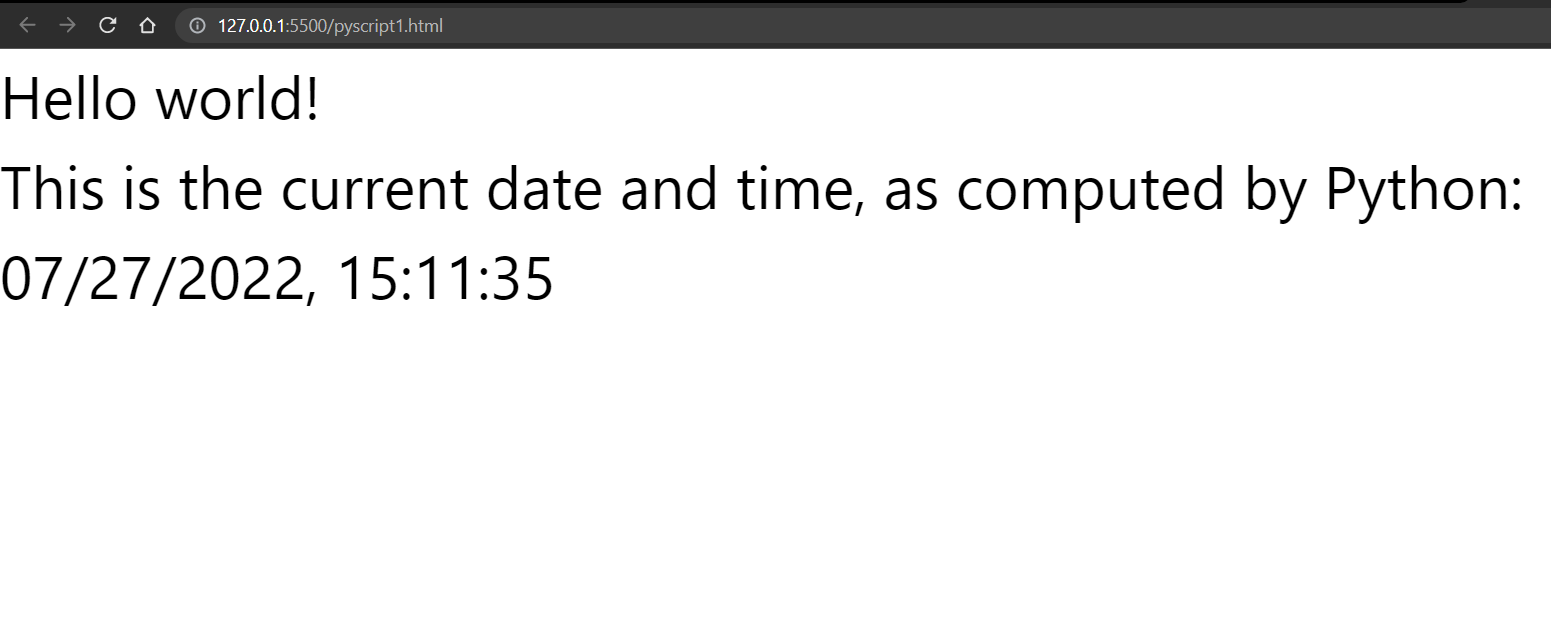

##Development Kurulumu (Development Setup)

PyScript, bir web tarayıcısı ve bir metin düzenleyicisi dışında herhangi bir geliştirme ortamı gerektirmez, ancak tercih edilen IDE'yi kullanmak uygun olabilir.

##Kurulum (Installation)
Kurulum gerekli değildir. Bu yazıda, https://pyscript.net üzerinde serve edilen PyScript assetleri kullanılacak.


Eğer kullanıcı kaynağı indirip kendisi oluşturmak istiyorsa README.md dosyasındaki talimatları izlemelidir.

##"Hello World" PyScript HTML Dosyası
PyScript kullanarak bir "Hello World!" yazma örneği verilecektir. 
Favori editör kullanılarak aşağıdaki içeriğe sahip ```hello.html``` adlı yeni bir dosya PyScript, JavaScript ve CSS dosyalarıyla aynı dizinde oluşturulur. Dosya web tarayıcısında açılır.

```
<html>
  <head>
    <link rel="stylesheet" href="https://pyscript.net/alpha/pyscript.css" />
    <script defer src="https://pyscript.net/alpha/pyscript.js"></script>
  </head>
  <body> <py-script> print('Hello, World!') </py-script> </body>
</html>
```

Görünüm şu şekilde olacaktır:

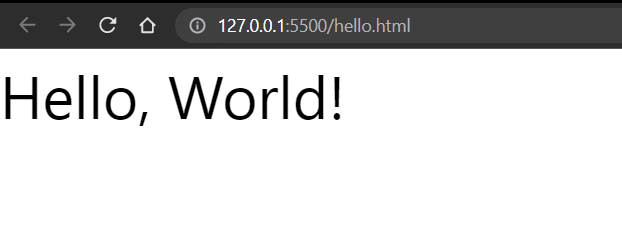

HTML gövdesinde ```<py-script>``` etiketinin kullanımına dikkat edilmesi gerekiyor. Python kodları buraya yazılır. PyScript tarafından sağlanan başka etiketler de bulunmaktadır.

##```py-script``` Etiketi (The py-script Tag)
```<py-script>``` etiketi, çok satırlı Python komut dosyalarının çalıştırılmasına ve sayfaya geri yazdırılmasını sağlar.

##Örnek#2:
π sayısını Python ile yazılan kod bloğuyla hesaplayıp web arayüzüne aktaran program:

```
<html>
  <head>
    <link rel="stylesheet" href="https://pyscript.net/alpha/pyscript.css" />
    <script defer src="https://pyscript.net/alpha/pyscript.js"></script>
  </head>
  <body>
      <py-script>
        print("Let's compute π:")
        def compute_pi(n):
            pi = 2
            for i in range(1,n):
                pi *= 4 * i ** 2 / (4 * i ** 2 - 1)
            return pi

        pi = compute_pi(100000)
        s = f"π is approximately {pi:.3f}"
        print(s)
      </py-script>
  </body>
</html>
``` 

Görünüm şu şekilde olacaktır:

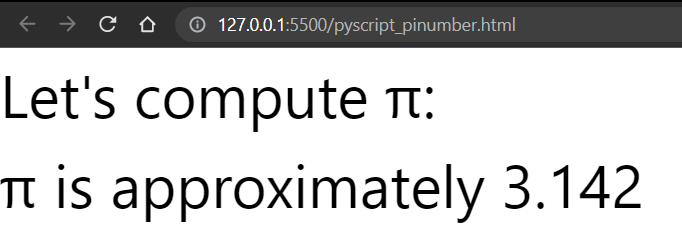

##Örnek#3:
Etiketli Elementlere Yazma (Writing into Labeled Elements)

Yukarıdaki örnekte, sayfaya sırayla bir veya daha fazla satır yazdıran tek bir ```<py-script>``` etiketi kullanıldı.

```<py-script>``` içinde, sayfadaki etiketli öğelere dizeler göndermek için bir ```.write()``` yöntemi sağlayan pyscript modülüne erişimi vardır.


 ```
 <html>
    <head>
      <link rel="stylesheet" href="https://pyscript.net/alpha/pyscript.css" />
      <script defer src="https://pyscript.net/alpha/pyscript.js"></script>
      <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.1.3/dist/css/bootstrap.min.css" rel="stylesheet" crossorigin="anonymous">
    </head>

  <body>
    <b><p>Today is <u><label id='today'></label></u></p></b>
    <br>
    <div id="pi" class="alert alert-primary"></div>
    <py-script>
      import datetime as dt
      pyscript.write('today', dt.date.today().strftime('%A %B %d, %Y'))

      def compute_pi(n):
          pi = 2
          for i in range(1,n):
              pi *= 4 * i ** 2 / (4 * i ** 2 - 1)
          return pi

      pi = compute_pi(100000)
      pyscript.write('pi', f'π is approximately {pi:.3f}')
    </py-script>
  </body>
</html>
```

Görünüm şu şekilde olacaktır:

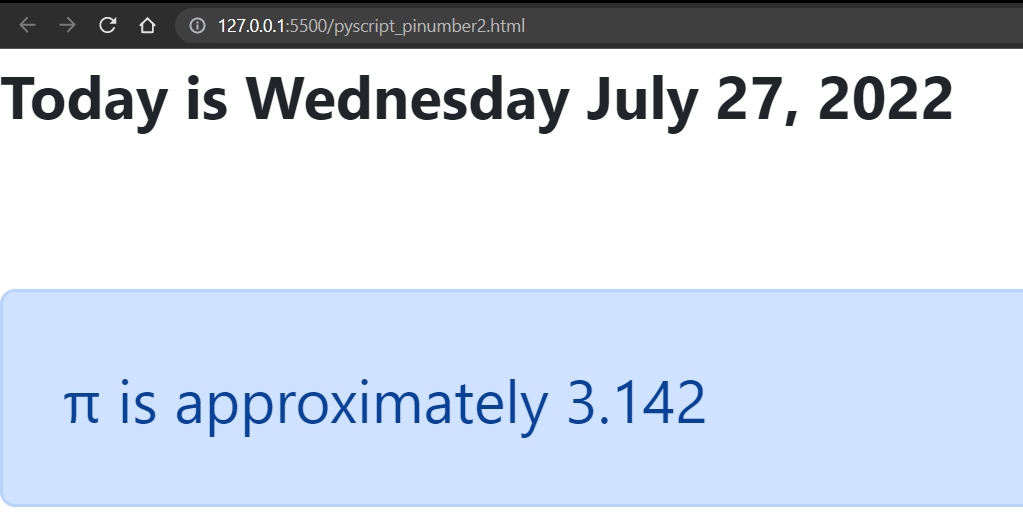

##```py-env``` Etiketi (The py-env Tag)
Python Standart Kitaplığı (Python Standard Library) ve ```pyscript``` modülüne ek olarak, birçok 3. taraf OSS paketi PyScript ile kullanıma hazır çalışır.

Bunları kullanmak için, HTML başlığındaki ```<py-env>``` etiketini kullanarak bağımlılıkların bildirilmesi gerekecektir.

Örneğin, NumPy ve Matplotlib mevcuttur. Burada, komut dosyasının son satırındaki ifadeyi alan ve ```pyscript.write('plot', fig)``` çalıştıran bir kısayol olarak ```<py-script output="plot">``` kullanımına dikkat edilmelidir.

Python Standart Kitaplığı Linki: https://docs.python.org/3/library/

```
<html>
    <head>
      <link rel="stylesheet" href="https://pyscript.net/alpha/pyscript.css" />
      <script defer src="https://pyscript.net/alpha/pyscript.js"></script>
      <py-env>
        - numpy
        - matplotlib
      </py-env>
    </head>

  <body>
    <h1>Let's plot random numbers</h1>
    <div id="plot"></div>
    <py-script output="plot">
      import matplotlib.pyplot as plt
      import numpy as np

      x = np.random.randn(1000)
      y = np.random.randn(1000)

      fig, ax = plt.subplots()
      ax.scatter(x, y)
      fig
    </py-script>
  </body>
</html>
```

Görünüm şu şekilde olacaktır:

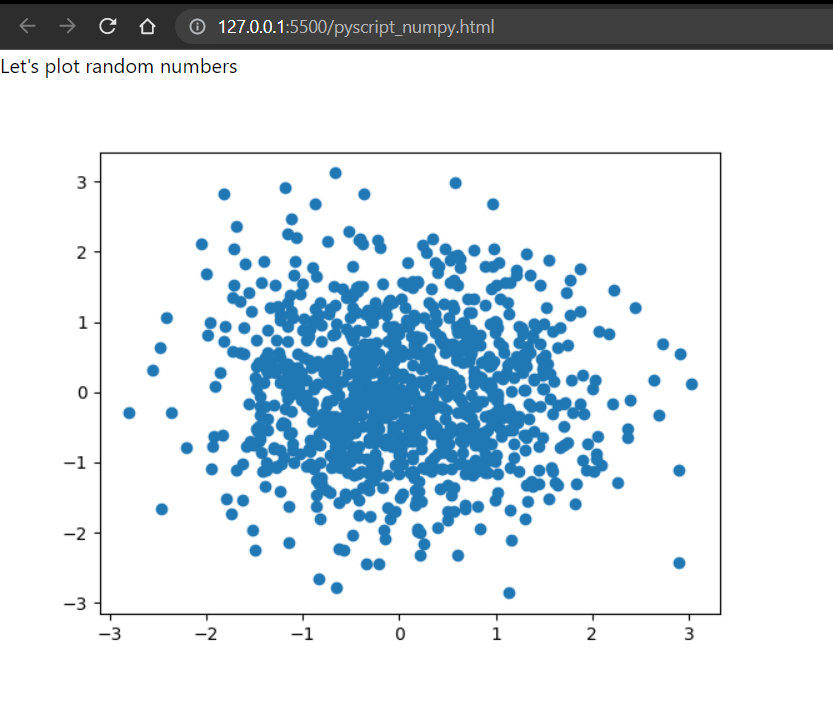

##Yerel Modüller (Local Modules)
Paketlere ek olarak, ```<py-script>``` etiketinde içe aktarılacak yerel Python modülleri bildirilebilir. Örneğin, rasgele sayı üretme adımları ```data.py``` dosyasındaki bir fonksiyona yerleştirip buradan çekilebilir.

```
# data.py dosyası
import numpy as np


def make_x_and_y(n):
    x = np.random.randn(n)
    y = np.random.randn(n)
    return x, y
```

```<py-env>``` HTML etiketinde, ```paths:``` anahtarında yerel modüllere (Local Modules) giden yollar sağlanır.


```
# html dosyası
<html>
    <head>
      <link rel="stylesheet" href="https://pyscript.net/alpha/pyscript.css" />
      <script defer src="https://pyscript.net/alpha/pyscript.js"></script>
      <py-env>
        - numpy
        - matplotlib
        - paths:
          - ./data.py
      </py-env>
    </head>

  <body>
    <h1>Let's plot random numbers</h1>
    <div id="plot"></div>
    <py-script output="plot">
      import matplotlib.pyplot as plt
      from data import make_x_and_y

      x, y = make_x_and_y(n=1000)

      fig, ax = plt.subplots()
      ax.scatter(x, y)
      fig
    </py-script>
  </body>
</html>
``` 

Görünüm yine şu şekilde olacaktır:

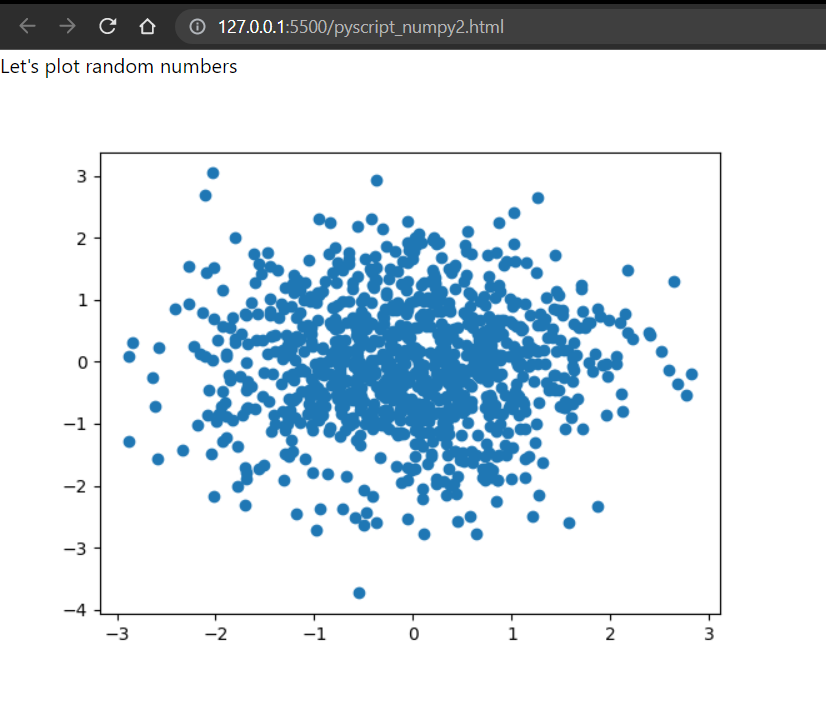

Bu kullanımda kod dizini önemlidir. Kod dizini görünümü şu şekilde olacaktır:

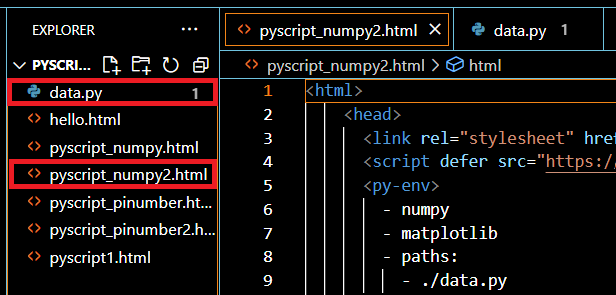

##```py-repl``` Etiketi (The py-repl Tag)
```<py-repl>``` etiketi, sayfaya kod düzenleyicisi olarak işlenen bir REPL bileşeni oluşturarak satır içi yürütülebilir kod yazılmasına olanak tanır.

```
<html>
  <head>
    <link rel="stylesheet" href="https://pyscript.net/alpha/pyscript.css" />
    <script defer src="https://pyscript.net/alpha/pyscript.js"></script>
  </head>
  <py-repl></py-repl>
</html>
```

##```py-config``` Etiketi (The py-config Tag)
YAML formatındaki PyScript uygulamasıyla ilgili genel meta verileri ayarlamak ve yapılandırmak için ```<py-config>``` etiketi kullanılır.

```
<py-config>
  autoclose_loader: false
  runtimes:
    - src: "https://cdn.jsdelivr.net/pyodide/v0.20.0/full/pyodide.js"
      name: pyodide-0.20
      lang: python
</py-config>
```